# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
monthly_income = 12000  
btc_amount = 1.2  
eth_amount = 5.3  

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
btc_response = requests.get(btc_url).json()
display(btc_response)
eth_response = requests.get(eth_url).json()
display(eth_response)

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19528387,
   'total_supply': 19528387,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 34497.0,
     'volume_24h': 16607378965,
     'market_cap': 675231787891,
     'percentage_change_1h': -0.526616273273128,
     'percentage_change_24h': 0.359799505338458,
     'percentage_change_7d': 11.3429582048019,
     'percent_change_1h': -0.526616273273128,
     'percent_change_24h': 0.359799505338458,
     'percent_change_7d': 11.3429582048019}},
   'last_updated': 1698683385}},
 'metadata': {'timestamp': 1698683385,
  'num_cryptocurrencies': 3119,
  'error': None}}

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120269588,
   'total_supply': 120269588,
   'max_supply': 120269588,
   'quotes': {'USD': {'price': 1812.15,
     'volume_24h': 11757181229,
     'market_cap': 218447547265,
     'percentage_change_1h': -0.174007787944238,
     'percentage_change_24h': 1.18362946560306,
     'percentage_change_7d': 7.61740183914109,
     'percent_change_1h': -0.174007787944238,
     'percent_change_24h': 1.18362946560306,
     'percent_change_7d': 7.61740183914109}},
   'last_updated': 1698683386}},
 'metadata': {'timestamp': 1698683386,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [6]:
# Fetch current BTC price
btc_price = btc_response['data']['1']['quotes']['USD']['price']
display(btc_price)
# Fetch current ETH price
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
display(eth_price)
# Compute current value of my crpto
my_btc_value = btc_amount * btc_price
my_eth_value = eth_amount * eth_price
# Print current crypto wallet balance
print(f"The current value of your {btc_amount} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth_amount} ETH is ${my_eth_value:0.2f}")

34497.0

1812.15

The current value of your 1.2 BTC is $41396.40
The current value of your 5.3 ETH is $9604.40


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.environ.get('ALPACA_KEY')
alpaca_secret_key = os.environ.get('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='v2')
api

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_combined = pd.concat([AGG, SPY], axis=1, keys =['SPY','AGG'])

# Preview DataFrame
df_combined

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2020-07-14 04:00:00+00:00  118.67  118.74  118.58       14582  118.58   

                                                   AGG                 \
                            volume        vwap   close    high    low   
timestamp                                                               
2020-07-14 04:00:00+00:00  4295871  118.667416  318.93  319.76  312.0   

                                                                    
                          trade_count   open    volume        vwap  
timestamp                                                           
2020-07-14 04:00:00+00:00      580272  313.3  94625450  316.274678

In [15]:
# Pick AGG and SPY close prices
spy_close_price = df_combined['SPY']['close']
spy_close_price = spy_close_price.values[0]
agg_close_price = df_combined['AGG']['close']
agg_close_price = agg_close_price.values[0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $318.93
Current SPY closing price: $118.67


In [16]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5933.50
The current value of your 200 AGG shares is $63786.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_eth_value + my_btc_value
stocks = my_spy_value + my_agg_value
data = {'amount' : [crypto, stocks]}
# Create savings DataFrame
df_savings = pd.DataFrame(data, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,51000.795
shares,69719.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

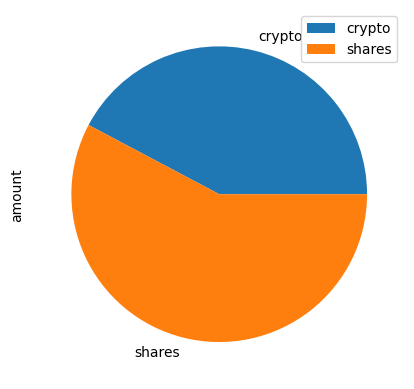

In [27]:
# Plot savings pie chart
# sector_count.plot(kind='pie')
df_savings.plot(kind ='pie', subplots=True)

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + stocks

# Validate saving health
if total_savings >= emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
else:
    print('Save more scrub')



Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [31]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [32]:
# Get 5 years' worth of historical data for SPY and AGG
df_portfolio_year = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio_year[df_portfolio_year['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio_year[df_portfolio_year['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys =['SPY','AGG'])

# Display sample data
df_stock_data.head()

SPY                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     AGG                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
MC_SPY_AGG = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [36]:
# Printing the simulation input data
df_stock_data

SPY                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   
...                            ...       ...       ...         ...     ...   
2021-04-26 04:00:00+00:00  114.650  114.8015  114.6500       13521  114.74   
2021-04-27 04:00:00+00:00  114.370  115.1300  114.3700       12734  115.13   
2021-04-28 04:00:00+00:00  114.430  114.4685  114.2000       24329  114.45   
2021-04-29 04:00:00+00:00  114.370  114.3700  114.0900       21243  114.14   
2021-04-30 04:00:00+00:00  114.490  114.5150  114.3300       19584  114.41   

                                                     AGG                    \
                            volume        vwap     close    high       low   
timestamp                                                                    
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.4100   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.2800   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.4200   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.4700   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.8800   
...                            ...         ...       ...     ...       ...   
2021-04-26 04:00:00+00:00  3687396  114.703085  417.6100  418.22  416.8111   
2021-04-27 04:00:00+00:00  3962274  114.493905  417.5200  418.14  416.3000   
2021-04-28 04:00:00+00:00  7411127  114.382062  417.4000  419.01  416.9000   
2021-04-29 04:00:00+00:00  6709216  114.258020  420.0600  420.72  416.4400   
2021-04-30 04:00:00+00:00  7705463  114.461660  417.3000  418.54  416.3400   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796  
...                               ...     ...        ...         ...  
2021-04-26 04:00:00+00:00      297405  417.44   53597096  417.511219  
2021-04-27 04:00:00+00:00      301338  417.93   52112393  417.481640  
2021-04-28 04:00:00+00:00      332655  417.81   51994369  417.739706  
2021-04-29 04:00:00+00:00      452194  420.32   80506526  418.860662  
2021-04-30 04:00:00+00:00      481284  417.63   87467317  417.640930  

[1259 rows x 14 columns]

In [37]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_SPY_AGG.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998727,0.998327,0.999169,1.001926,1.006858,0.993704,1.003243,0.996759,0.994023,1.005353,...,1.008700,1.007736,1.007249,1.006342,0.999121,0.997396,1.002462,0.992148,0.988096,0.987955
2,1.001105,0.998878,1.003774,0.998442,1.007866,0.995333,1.002993,0.994445,0.985428,1.010856,...,1.005446,1.014700,1.014180,1.009017,0.991211,0.998326,0.999256,0.987323,0.980904,0.993710
3,1.002267,1.003335,1.007966,0.995028,1.008898,0.984638,1.008555,0.994924,0.998773,1.002727,...,1.005461,1.027283,1.012674,1.005831,0.993305,0.997602,1.004055,0.990433,0.985084,0.989506
4,1.002232,1.004899,1.007070,0.997923,1.008231,0.986557,1.008559,0.993639,1.002082,0.998318,...,1.016081,1.035381,1.006269,1.012568,0.986474,1.001902,1.012752,0.993626,0.984978,0.979620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.285952,10.469094,15.734513,10.054987,8.688226,7.466248,19.041655,16.936911,21.411233,18.210527,...,9.759034,24.649107,8.421192,14.482030,6.875068,17.463227,8.194133,8.550642,11.427642,12.767765
7557,5.314465,10.444775,15.607342,10.000880,8.646836,7.433242,19.032171,16.957320,21.388878,18.010045,...,9.613870,24.449254,8.467795,14.539580,6.898540,17.489726,8.155155,8.519473,11.414781,12.716771
7558,5.316716,10.488137,15.612182,10.032312,8.646568,7.400188,19.090236,16.997447,21.187270,17.858437,...,9.568942,24.496954,8.447269,14.321427,6.930664,17.414167,8.159941,8.584350,11.514792,12.615493
7559,5.265284,10.469977,15.770291,10.028952,8.621697,7.410500,19.045581,16.920008,21.130846,17.742607,...,9.491421,24.590084,8.489133,14.270481,6.924053,17.570010,8.157026,8.575112,11.540905,12.809632


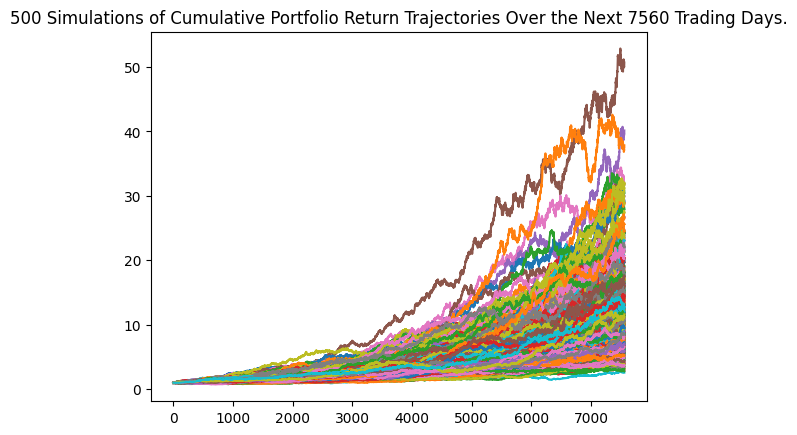

In [38]:
# Plot simulation outcomes
portfolio_plot = MC_SPY_AGG.plot_simulation()

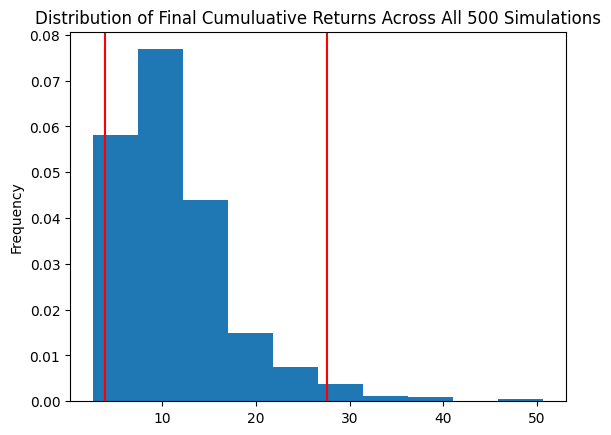

In [39]:
# Plot probability distribution and confidence intervals
portfolio_plot_2 = MC_SPY_AGG.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
table = MC_SPY_AGG.summarize_cumulative_return()

# Print summary statistics
print(table)

count           500.000000
mean             11.352277
std               6.192690
min               2.561041
25%               6.947032
50%              10.014902
75%              14.101556
max              50.703919
95% CI Lower      3.856661
95% CI Upper     27.624916
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [49]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(table[8]*20000,2)
ci_upper = round(table[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77133.21 and $552498.32


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [50]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(table[8]*initial_investment,2)
ci_upper = round(table[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $115699.82 and $828747.49


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


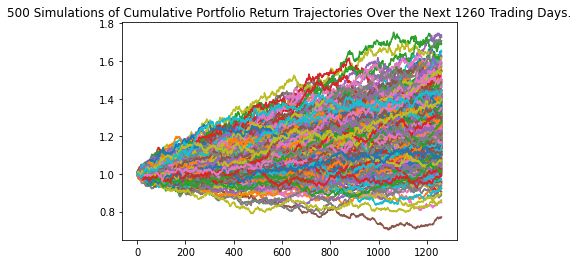

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

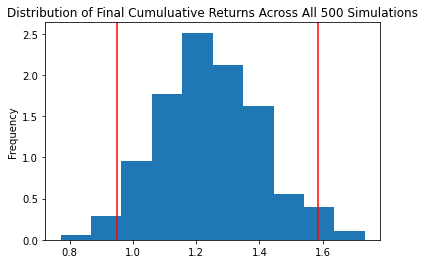

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


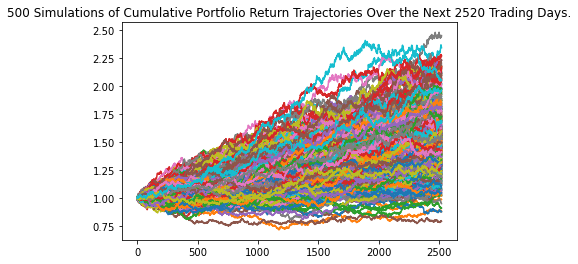

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

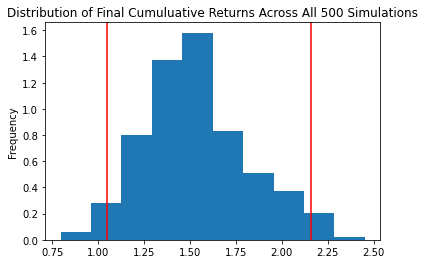

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
